#Lab 6 - Time Evolution
Exploring time evolution of quantum states. Run the usual imports, but leave out "inline" since we want plots to appear in a new window this time. Also, use the spin-1/2 states as previously defined:

In [1]:
import matplotlib.pyplot as plt
from numpy import sqrt,pi,arange,cos,sin
from qutip import *

In [2]:
%matplotlib inline

In [3]:
pz = Qobj([[1],[0]])
mz = Qobj([[0],[1]])
px = Qobj([[1/sqrt(2)],[1/sqrt(2)]])
mx = Qobj([[1/sqrt(2)],[-1/sqrt(2)]])
py = Qobj([[1/sqrt(2)],[1j/sqrt(2)]])
my = Qobj([[1/sqrt(2)],[-1j/sqrt(2)]])
Sx = 1/2.0*sigmax()
Sy = 1/2.0*sigmay()
Sz = 1/2.0*sigmaz()

Define the Hamiltonian:

In [4]:
omega = 2*pi
H = -omega*Sz

In [5]:
t = arange(0,4*pi/omega,0.05)

The next line calls a Schrödinger equation solver (sesolve). It's arguments are the Hamiltonian, the starting state (px), the time values, and a list of operators. `sesolve` returns many things, but the `expect` method is most useful, it gives the expectation values of the three operators in the operator list.

In [6]:
result1 = sesolve(H, px, t, [Sx,Sy,Sz])

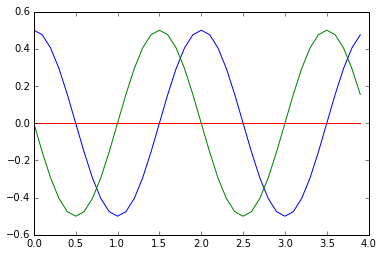

In [7]:
for r in result1.expect:
    plt.plot(result1.times*omega/pi, r)

Now what if the system starts in $|+z\rangle$?

In [8]:
result2 = sesolve(H, pz, t, [Sx,Sy,Sz])

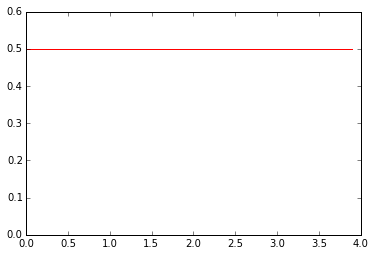

In [9]:
for r in result2.expect:
    plt.plot(result2.times*omega/pi, r)

## Two particle systems:

In [10]:
psi = 1/sqrt(2)*tensor(pz, mz) + 1/sqrt(2)*tensor(mz, pz)
#psi = tensor(mz,pz)

Hamiltonian is the same for both particles so we use the tensor to form $\hat{H}$ from individual operators

In [11]:
omega = 5
H = -omega*tensor(Sz,Sz)

In [12]:
result3 = sesolve(H, psi, t, tensor(pz,mz)*tensor(pz,mz).dag())

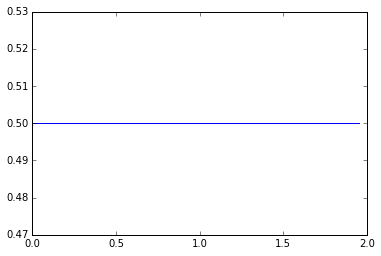

In [13]:
plt.plot(result3.times,result3.expect[0])

The value is constant since the state is initially in an eigenstate of $\hat{H}$.

##What if the magnetic field is not along an axis?

Notice the Hamiltonian has an $x$ and a $z$ component:

In [14]:
omega=2
H = -omega*(Sz + Sx)
t = arange(0,2*pi/omega,0.05)

In [15]:
result4 = sesolve(H, px, t, [Sx, Sy, Sz])

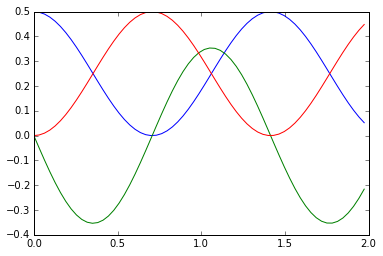

In [16]:
for r in result4.expect:
    plt.plot(result4.times*omega/pi, r)

Harder to interpret (visualize), so we'll use the Bloch sphere:

In [17]:
sx, sy, sz = result4.expect

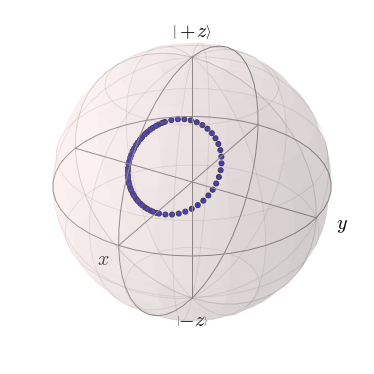

In [18]:
b = Bloch()
b.add_points([sx,sy,sz])
b.zlabel = ['$\\left|+z\\right>$', '$\\left|-z\\right>$']
b.show()

Click and drag the image to rotate it. Now we can interpret the dynamics as precession around the magnetic field.

## Time-dependent Hamiltonian:
We'll explore the parameters of a spin in a time-varying magnetic field. This system is relevant to nuclear magnetic resonance (NMR) which is used in chemistry and as Magnetic Resonance Imaging (MRI) in medicine.

Following Compliment 9.A the Hamiltonian is:
$$\hat{H}= - \Omega_0 \hat{S}_z - \Omega_1 cos(\omega t)\hat{S}_x$$
We then solve for a certain amount of time after the state starts in $|\psi(0)\rangle = |+z\rangle$

We also use the definition of the Rabi frequency: $\Omega_R = \sqrt{(\omega - \Omega_0)^2 + (\Omega_1/2)^2}$ as in (9.A.28)

Note that the time span is 3 units of $\frac{2\pi}{\Omega_R}$. Leave the scaling in place, but to plot a longer time period, change 3.0 to something larger. This lets us match the units in Fig. 9.A.1.

In [19]:
omega0 = 2.0 * 2 * pi   # pick a nice value for a frequency, note this is 1 Hz
omega1 = 0.25 * 2 * pi  # 25% of omega0
w = 2.0 * 2 * pi        # the driving frequency

H0 = - omega0 * Sz      # the first term in H
H1 = - omega1 * Sx      # the second term in H

omegaR = sqrt((w - omega0)**2 + (omega1/2.0)**2)
t = arange(0,3.0 * 2 * pi / omegaR,0.05)   # scale the time by omegaR, plot 3 units of 2pi/omegaR

args = [H0, H1, w]      # parts of the Hamiltonian 
def H_t(t, args):       # this function calculates H at each time step t
    H0 = args[0]
    H1 = args[1]
    w  = args[2]
    return H0 + cos(w * t) * H1

The next line calls a Schrödinger equation solver (sesolve). It's arguments are the Hamiltonian, the starting state (pz), the time values, a list of operators, and the arguments to the function H_t. `sesolve` returns many things, but the `expect` method is most useful, it gives the expectation values of the four operators in the operator list. Notice the fourth operator is the mz projection operator. It's expectation value is $P(|-z\rangle,t)$

In [20]:
result5 = sesolve(H_t, pz, t, [Sx, Sy, Sz, mz*mz.dag()],args)
sx, sy, sz, Pz = result5.expect

Look at the Bloch sphere for this system:

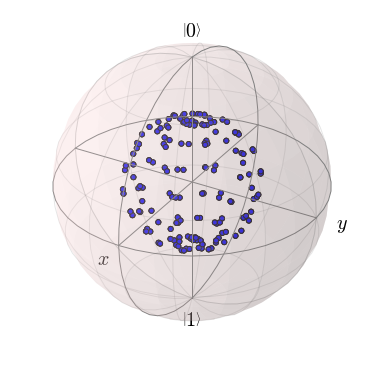

In [21]:
b = Bloch()
b.add_points([sx,sy,sz])
b.show()

Make a plot analogous to Fig 9.A.1:

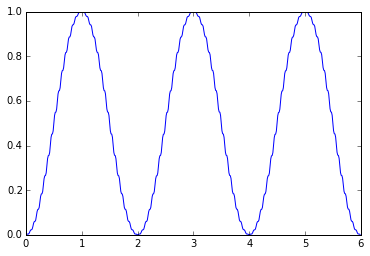

In [22]:
plt.plot(result5.times*omegaR/pi,Pz)

###Q) What happens in each unit of time ($\frac{2\pi}{\Omega_R}$)? Look at the plot of $P(-z,t)$ to interpret this. How is your figure different from the on in Fig. 9.A.1?

### Q) How does the evolution change if you double $\Omega_0$?

###Q) After doubling $\Omega_0$ what if you double the driving frequency ($\omega$) also? Interpret this observation in terms of Fig. 9.A.2. In practice, what experimental parameter changes $\Omega_0$?

###Q) How does $\Omega_1$ influence the dynamics? (Be careful reading the plots since the units are scaled by $\Omega_R$).

### Challenge: change the Hamiltonian so the applied field turns off at a certain time, can you get the spin to stay in a particular state?

In [40]:
omega0 = 1.0 * 2 * pi   # pick a nice value for a frequency, note this is 1 Hz
omega1 = 0.05 * 2 * pi  # 25% of omega0
w = 1.0 * 2 * pi        # the driving frequency

H0 = - omega0 * Sz      # the first term in H
H1 = - omega1 * Sx      # the second term in H

omegaR = sqrt((w - omega0)**2 + (omega1/2.0)**2)
t = arange(0,3.0 * 2 * pi / omegaR,0.05)   # scale the time by omegaR, plot 3 units of 2pi/omegaR

args = [H0, H1, w]      # parts of the Hamiltonian 
def H_t(t, args):       # this function calculates H at each time step t
    H0 = args[0]
    if t < 2*pi/omegaR * 0.5:
        H1 = args[1]
    else:
        H1 = 0
    w  = args[2]
    return H0 + cos(w * t) * H1

In [41]:
result6 = sesolve(H_t, pz, t, [Sx, Sy, Sz, mz*mz.dag()],args)
sx, sy, sz, Pz = result6.expect

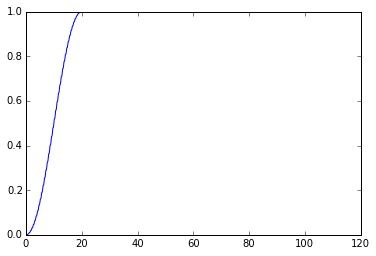

In [42]:
plt.plot(result6.times,Pz)